# Red Wine Quality ~ EDA & Classification


### 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu

In [2]:
# Bước 1: Chuẩn bị dữ liệu
import pandas as pd

# Đọc dữ liệu
wine = pd.read_csv("winequality-red.csv")

df = wine.copy()
df.head(n = 10).style.background_gradient(cmap = "Purples_r")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


In [3]:
# Thông tin tổng quan
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
# Mô tả thống kê
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

### 2 Tạo thêm các biến phân loại hỗ trợ|

#### Chất lượng rượu chia thành 3 nhóm
#### Low: quality ≤ 5
#### Medium: quality = 6
#### High: quality ≥ 7

In [6]:
# Phân loại chất lượng rượu
def label_quality(q):
    if q <= 5:
        return 'Low'
    elif q == 6:
        return 'Medium'
    else:
        return 'High'

wine['quality_label'] = wine['quality'].apply(label_quality)

# Kiểm tra phân bố
print(wine['quality_label'].value_counts())


quality_label
Low       744
Medium    638
High      217
Name: count, dtype: int64


### 3 Trực quan hóa dữ liệu với Matplotlib

#### Case 1: Basic


##### Thể hiện số lượng rượu theo từng mức chất lượng:

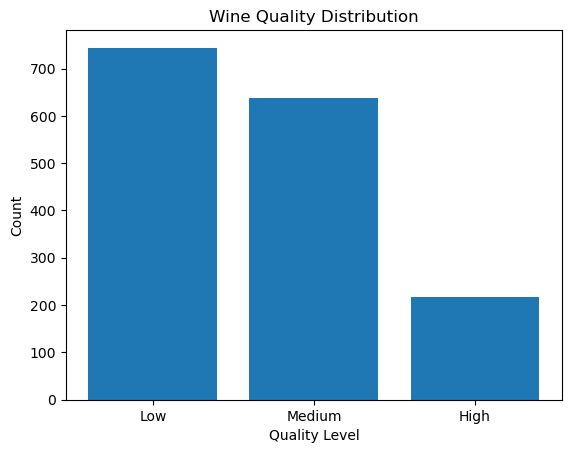

In [7]:
import matplotlib.pyplot as plt

x = wine['quality_label'].value_counts().index
y = wine['quality_label'].value_counts().values

plt.bar(x, y)
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Level")
plt.ylabel("Count")
plt.show()


#### Kết quả phân bố cho thấy:
#### Low: 46.53% mẫu
#### Medium: 39.90% mẫu
#### High: 13.57% mẫu
#### => Nhìn sơ, tập dữ liệu có nhiều mẫu chất lượng trung bình hoặc thấp; mẫu "thật sự tốt" (High) chiếm tỷ lệ nhỏ ~13.6%

#### Case 2: Advaced 1

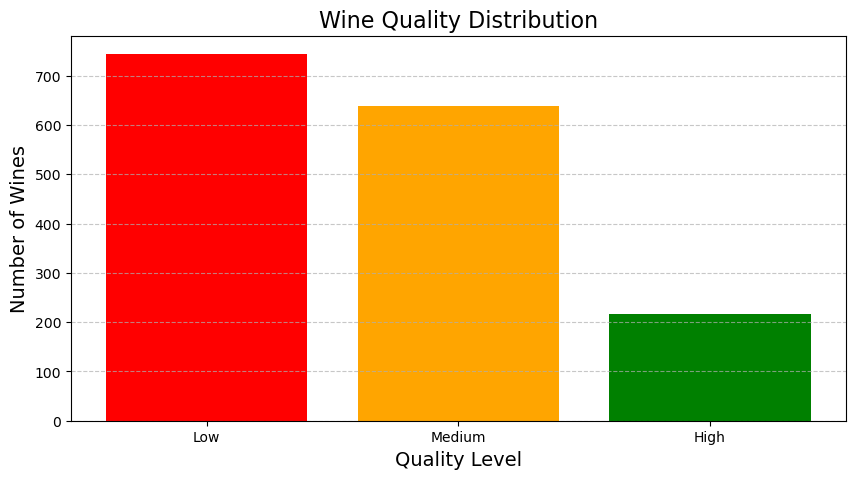

In [9]:
plt.figure(figsize=(10,5))
plt.bar(x, y, color=['red','orange','green'])
plt.title("Wine Quality Distribution", fontsize=16)
plt.xlabel("Quality Level", fontsize=14)
plt.ylabel("Number of Wines", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Case 3: So sánh 2 đặc trưng

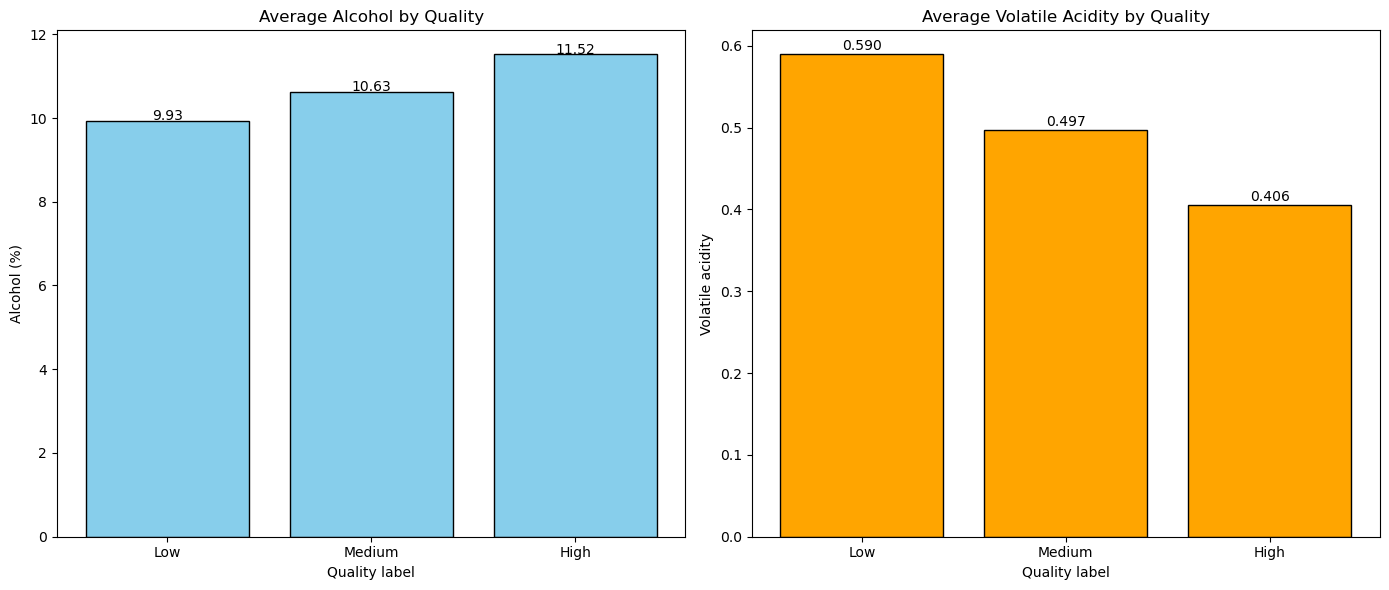

In [13]:
import matplotlib.pyplot as plt

# Tính 1 lần, đảm bảo thứ tự Low, Medium, High
group_alcohol = wine.groupby('quality_label')['alcohol'].mean().reindex(['Low','Medium','High'])
group_va = wine.groupby('quality_label')['volatile acidity'].mean().reindex(['Low','Medium','High'])

labels = group_alcohol.index.tolist()   # ['Low','Medium','High']
alcohol_means = group_alcohol.values
va_means = group_va.values

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ Alcohol
ax[0].bar(labels, alcohol_means, color='skyblue', edgecolor='black')
ax[0].set_title("Average Alcohol by Quality")
ax[0].set_xlabel("Quality label")
ax[0].set_ylabel("Alcohol (%)")
# annotate giá trị lên từng thanh
for i, v in enumerate(alcohol_means):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center')

# Biểu đồ Volatile Acidity
ax[1].bar(labels, va_means, color='orange', edgecolor='black')
ax[1].set_title("Average Volatile Acidity by Quality")
ax[1].set_xlabel("Quality label")
ax[1].set_ylabel("Volatile acidity")
for i, v in enumerate(va_means):
    ax[1].text(i, v + 0.005, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()


#### Biểu đồ Average Alcohol by Quality
##### Trục X: Phân nhóm chất lượng rượu — Low, Medium, High
##### Trục Y: Giá trị trung bình của nồng độ cồn (%)

##### Kết quả:
##### Rượu chất lượng thấp (Low) có nồng độ cồn trung bình khoảng 9.93%
##### Rượu trung bình (Medium) có nồng độ cồn trung bình 10.63%
##### Rượu cao cấp (High) có nồng độ cồn trung bình 11.52%

##### Nhận xét:
##### Ta thấy xu hướng rõ ràng tăng dần — rượu có chất lượng càng cao thì nồng độ cồn càng lớn.
##### Điều này hợp lý vì trong quá trình sản xuất rượu vang, lượng cồn thường tỷ lệ thuận với mức độ lên men hoàn chỉnh và lượng đường được chuyển hóa, dẫn đến vị rượu cân bằng, đậm đà hơn — thường được đánh giá là chất lượng tốt hơn

#### Biểu đồ bên phải: Average Volatile Acidity by Quality  
#####  
##### Trục X: Phân nhóm chất lượng rượu — Low, Medium, High  
##### Trục Y: Giá trị trung bình của độ axit bay hơi (volatile acidity)  
#####  
##### Kết quả:  
##### Rượu Low có độ axit bay hơi trung bình 0.590  
##### Rượu Medium là 0.497  
##### Rượu High chỉ 0.406  
#####  
##### Nhận xét:  
##### Ngược lại, ta thấy xu hướng giảm dần — rượu càng ngon thì độ axit bay hơi càng thấp.  
##### Điều này cũng rất hợp lý vì axit bay hơi cao thường tạo ra mùi chua gắt hoặc mùi giấm nhẹ, gây ảnh hưởng tiêu cực đến hương vị của rượu.  
##### => Rượu có volatile acidity thấp sẽ êm dịu, cân bằng hơn, nên thường được đánh giá chất lượng cao.  


### Bước 4. Trực quan hóa với Seaborn

C:\Users\HP\AppData\Local\Temp\ipykernel_19896\2937774245.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=wine, x='quality_label', y='citric acid', palette='viridis')


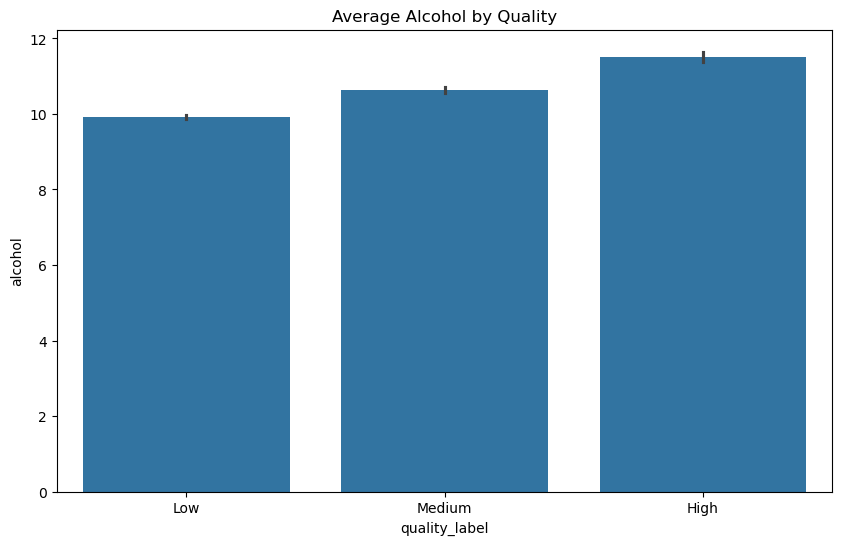

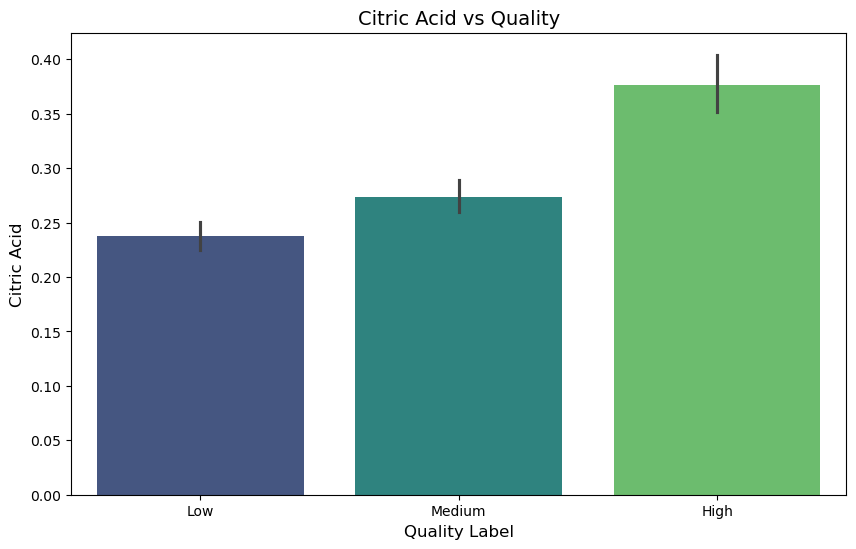

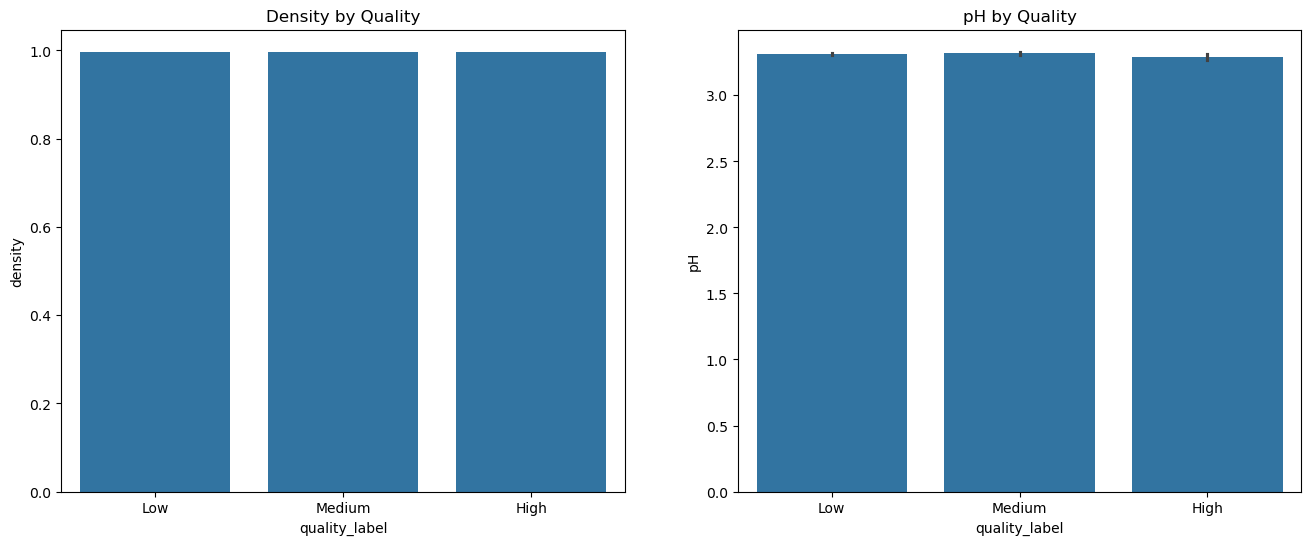

In [14]:
import seaborn as sns

# Case 1: Basic
plt.figure(figsize=(10,6))
sns.barplot(data=wine, x='quality_label', y='alcohol')
plt.title("Average Alcohol by Quality")

# Case 2: Advanced
plt.figure(figsize=(10,6))
ax = sns.barplot(data=wine, x='quality_label', y='citric acid', palette='viridis')
ax.set_xlabel("Quality Label", fontsize=12)
ax.set_ylabel("Citric Acid", fontsize=12)
ax.set_title("Citric Acid vs Quality", fontsize=14)

# Case 3: Multiple comparisons
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.barplot(data=wine, x='quality_label', y='density', ax=ax[0])
sns.barplot(data=wine, x='quality_label', y='pH', ax=ax[1])
ax[0].set_title("Density by Quality")
ax[1].set_title("pH by Quality")
plt.show()


#### 1️⃣ Case 1: Average Alcohol by Quality  
##### Biểu đồ đầu tiên là trung bình nồng độ cồn (alcohol) theo từng mức chất lượng (quality_label).  
#####  
##### Quan sát:  
##### Rượu Low quality có nồng độ cồn trung bình thấp nhất.  
##### Rượu Medium cao hơn.  
##### Rượu High quality đạt mức cao nhất về nồng độ cồn.  
#####  
##### Phân tích:  
##### Nồng độ cồn phản ánh mức độ lên men — quá trình men chuyển hóa đường thành rượu.  
##### Rượu có hàm lượng cồn cao hơn thường có:  
##### • Hương vị mạnh mẽ, cân bằng hơn  
##### • Ít đường dư, cho cảm giác “sạch” khi uống  
##### → Do đó, alcohol tăng thường đi cùng chất lượng cao hơn, điều này phù hợp với các nghiên cứu cảm quan về rượu vang đỏ.  
#####  
##### Kết luận:  
##### “Rượu ngon thường có nồng độ cồn cao hơn một chút — dấu hiệu của sự lên men hoàn chỉnh và chất lượng nguyên liệu tốt.”  

####  2️⃣ Case 2: Citric Acid vs Quality  
##### Citric acid (axit xitric) là một thành phần axit hữu cơ tự nhiên trong rượu, ảnh hưởng trực tiếp đến độ tươi và vị chua nhẹ.  
#####  
##### Quan sát:  
##### Nhóm rượu Low quality có hàm lượng citric acid thấp nhất.  
##### Rượu Medium cao hơn một chút.  
##### Rượu High quality có citric acid cao nhất.  
#####  
##### Phân tích:  
##### Axit xitric tạo cảm giác tươi mát, cân bằng, giúp hương vị hài hòa hơn — đặc biệt trong rượu vang đỏ.  
##### Rượu có ít citric acid thường bị cảm nhận là “nhạt”, “thiếu độ chua thanh”, do đó dễ bị đánh giá thấp hơn về chất lượng.  
#####  
##### Kết luận nhỏ:  
##### “Citric acid tăng góp phần làm rượu có vị cân bằng, tươi sáng và được đánh giá cao hơn.”  

#### 3️⃣ Case 3: Density by Quality & pH by Quality  
##### Hai biểu đồ này đặt cạnh nhau để so sánh đặc tính hóa học quan trọng khác: mật độ (density) và độ pH.  
#####  
##### Density by Quality  
##### Quan sát:  
##### Rượu Low quality có mật độ cao nhất.  
##### Rượu High quality có mật độ thấp nhất.  
#####  
##### Phân tích:  
##### Mật độ (density) phụ thuộc vào lượng đường còn lại và cồn:  
##### • Rượu có nhiều cồn hơn → mật độ giảm.  
##### • Rượu có nhiều đường dư hoặc ít lên men → mật độ tăng.  
##### Điều này khớp với xu hướng alcohol ở Case 1, vì rượu chất lượng cao thường có alcohol cao, density thấp.  
#####  
##### Kết luận nhỏ:  
##### “Rượu càng ngon thì càng ‘nhẹ’ – mật độ thấp cho thấy quá trình lên men triệt để và ít tạp chất.”  
#####  
##### pH by Quality  
##### Quan sát:  
##### Rượu Low có pH cao hơn một chút.  
##### Rượu High có pH thấp hơn (tức là axit hơn một chút).  
#####  
##### Phân tích:  
##### Độ pH phản ánh độ axit tổng thể của rượu:  
##### • Rượu có pH thấp → vị chua nhẹ, tươi sáng, ổn định hơn.  
##### • Rượu pH cao → dễ bị “đục vị”, thiếu độ tươi.  
#####  
##### Kết luận nhỏ:  
##### “Rượu chất lượng cao thường có pH thấp hơn, giúp hương vị tươi và cân bằng hơn.”  

#### 4️⃣ Tổng kết chung – “Chân dung của một ly rượu vang ngon”  
##### Từ 4 đặc trưng vừa phân tích (Alcohol, Citric Acid, Density, pH), ta có thể mô tả rượu vang đỏ chất lượng cao như sau:  
#####  
##### | Đặc trưng  | Xu hướng ở rượu ngon | Ý nghĩa cảm quan             |  
##### |------------|----------------------|------------------------------|  
##### |   Alcohol  |       Cao hơn        | Hương vị mạnh, đậm đà        |  
##### | Citric Acid|       Cao hơn        | Vị chua thanh, cân bằng      |  
##### |  Density   |       Thấp hơn       | Ít đường dư, tinh khiết hơn  |  
##### |    pH      |       Thấp hơn       | Vị tươi sáng, axit hài hòa   |  
#####  
##### **Tóm lại:**  
##### Một ly rượu vang đỏ ngon là sự hòa quyện tinh tế giữa “độ mạnh” của cồn và “độ thanh” của axit – được phản ánh rõ qua các đặc trưng hóa học trong dữ liệu.  
##### Việc trực quan hóa giúp ta nhìn thấy câu chuyện của rượu vang, thay vì chỉ đọc những con số khô khan.  
